In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Reading in Data

Basic beginnings, reading in both the train and test sets. Additionally, I took the 'SalePrice' column out of the `train` dataframe and set it as its own series, namely `target`.

This makes it so `train` and `test` are identical in columns/features.

In [2]:
train = pd.read_csv("C:/Users/GuillermoGutierrez/Documents/Kaggle/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("C:/Users/GuillermoGutierrez/Documents/Kaggle/house-prices-advanced-regression-techniques/test.csv")
target = train['SalePrice']
train.drop(labels='SalePrice', axis=1, inplace=True)

Below, I've set the max amount of columns to display to 200 just for ease of use.

In [3]:
pd.set_option('display.max_columns', 200)
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,

## Exploring and Cleaning Data

Since I've gone through this data a few times, I've already identified some features which don't seem to be helpful when predicting SalePrice. Also, some of the features below represent redundant features, i.e. those that seem to explain the same thing as another feature (**GarageCars** vs. **GarageArea**)

I begin by dropping all those columns from both the `train` and `test` sets. Every clearning step that I do to the `train` set I mirror to the `test` so that they're consistent. 

In [4]:
columns_to_drop = ['Id', 'Alley', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageType', 'GarageYrBlt', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'SaleCondition', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'Utilities']
train.drop(labels=columns_to_drop, axis=1, inplace=True)
test.drop(labels=columns_to_drop, axis=1, inplace=True)

Verifying that all the columns are still the same between the two datasets. 

In [5]:
(train.columns == test.columns).all()

True

Below are the columns/features I'm left to work with:

In [6]:
train.columns

Index(['MSSubClass', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish',
       'GarageCars', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SaleType'],
      dtype='object')

Next, I want to see how many `np.nan` values are contained within each of the columns in the `train` set. The `DataFrame.count()` method allows me to count the values not equal to `np.nan`, and since I know I have 1460 training examples (rows) in the `train` set, I can see any value lower than 1460 indicates the presence of `np.nan`s. 

Since `DataFrame.count()` returns a `pd.Series` object, the `Series.to_frame()` method converts in back to a `pd.DataFrame` object with each columns' real number counts as its rows. Using the `DataFrame.T` attribute of that object gives me the transpose of the dataframe, thereby returning a better view of each column and its associated real number counts. 

In [7]:
train.count().to_frame().T

,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType
0,1460,1460,1460,1460,1460,1460,1460,1452,1452,1460,1460,1423,1422,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1379,1460,1460,1460,1460,1460,1460,1460


Initially, I notice both **MasVnrType** and **MasVnrArea** are missing the same number of values. Refering back to the `data_description.txt` file included in the Kaggle competition's data package, I've noticed that the **MasVnrType** column already has an entry for 'None', so I'll need to convert any `np.nan` values to that.

Also, for completeness, I'll go ahead and verify that the training examples which exhibit `np.nan` values in the **MasVnrType** column are the same ones with `np.nan`s in the **MasVnrArea** column.

In [8]:
train[train['MasVnrType'].isna()]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

Having verified the correlation between `np.nan`s in **MasVnrType** and **MasVnrArea**, I can confidently go ahead and replace `np.nan`s in the **MasVnrType** column with 'None' and similarly replace `np.nan`s in **MasVnrArea** with 0 (since its a continuous variable).

In [9]:
train['MasVnrType'].replace(to_replace={np.nan: 'None'}, inplace=True)
test['MasVnrType'].replace(to_replace={np.nan: 'None'}, inplace=True)

train['MasVnrArea'].replace(to_replace={np.nan: 0}, inplace=True)
test['MasVnrArea'].replace(to_replace={np.nan: 0}, inplace=True)

Now to check our real value counts once again and find other columns needing to be cleaned. There aren't many so I'll just gloss over this part since its a bit repetitive. Also, note that for each column I clean, I consult with the `data_description.txt` file to see if there is an exisiting value for the column which should cover `np.nan` values. If one such value doesn't exist, then I create a new value and call it 'None'.

In [10]:
train.count().to_frame().T

,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType
0,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1423,1422,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1379,1460,1460,1460,1460,1460,1460,1460


In [11]:
train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [12]:
train['BsmtQual'].replace(to_replace={np.nan: 'None'}, inplace=True)
test['BsmtQual'].replace(to_replace={np.nan: 'None'}, inplace=True)

In [13]:
train['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [14]:
train['BsmtExposure'].replace(to_replace={np.nan: 'No'}, inplace=True)
test['BsmtExposure'].replace(to_replace={np.nan: 'No'}, inplace=True)

In [15]:
train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [16]:
train['GarageFinish'].replace(to_replace={np.nan: 'None'}, inplace=True)
test['GarageFinish'].replace(to_replace={np.nan: 'None'}, inplace=True)

Fantastic, so now I should have 1460 real values in each of the columns. I can consider this data to be fairly clean now; I haven't scrubbed for obvious outliers in the data (training examples which significantly deviate from the norm), but thats okay. The work doesn't have to be perfect on the first pass.

In [17]:
train.count().to_frame().T

,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType
0,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460


## Feature Encoding

The next step in my process has been to encode certain features so as to make them accessible to the regression models I want to use later on. In order to do this, I've gone ahead and separated allmy features into three columns: categorical variables (`cat_vars`), ordinal variables (`ord_vars`), and numerical variables (`num_vars`).

In [18]:
cat_vars = ['MSSubClass', 'Neighborhood', 'MasVnrType', 'Foundation', 'CentralAir', 'PavedDrive', 'SaleType']
ord_vars = ['OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'GarageFinish']
num_vars = ['LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']

First, I'll check out the ordinal variables.

In [19]:
train[ord_vars].head(10)

,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageFinish
0,7,5,Gd,Gd,No,Ex,Gd,RFn
1,6,8,TA,Gd,Gd,Ex,TA,RFn
2,7,5,Gd,Gd,Mn,Ex,Gd,RFn
3,7,5,TA,TA,No,Gd,Gd,Unf
4,8,5,Gd,Gd,Av,Ex,Gd,RFn
5,5,5,TA,Gd,No,Ex,TA,Unf
6,8,5,Gd,Ex,Av,Ex,Gd,RFn
7,7,6,TA,Gd,Mn,Ex,TA,RFn
8,7,5,TA,TA,No,Gd,TA,Unf
9,5,6,TA,TA,No,Ex,TA,RFn


Before I go ahead and encode these variables, I want to make sure that my encoding process doesn't accidently create new columns in the `train` set that don't appear in the `test` set. This is an issue that could arise since I'm using One-Hot Encoding, which transforms a single column into multiple ones based on the number of unique values found in the original column. 

So, if the same column in the `train` and `test` sets happens to contain an different number of unique values, my encoding process could inadvertantly make the datasets incompatible, which would be a big issue later on.

The `for-loop` below loops through all the ordinal variables and checks whether or not the unique values in both columns are the same and, if they're not, alerts me to that.  

In [20]:
for column in ord_vars:
    if not (set(train[column].values) == set(test[column].values)):
        print(column)

KitchenQual


And boom, turns out **KitchenQual** doesn't line up. Let's investigate.

In [21]:
set(train['KitchenQual'].values), set(test['KitchenQual'].values)

({'Ex', 'Fa', 'Gd', 'TA'}, {'Ex', 'Fa', 'Gd', 'TA', nan})

Ah, the `test` set contains a `np.nan` value! Looks like I'll have to find something to replace it with. 

In [22]:
train['KitchenQual'].value_counts(), test['KitchenQual'].value_counts()

(TA    735
 Gd    586
 Ex    100
 Fa     39
 Name: KitchenQual, dtype: int64, TA    757
 Gd    565
 Ex    105
 Fa     31
 Name: KitchenQual, dtype: int64)

Given this is an ordinal variable, replacing the `np.nan` with 'None' doesn't really make sense. Instead, I'll go ahead and replace it with the most common value in the **KitchenQual** column, 'TA'.

In [23]:
test['KitchenQual'].replace(to_replace={np.nan: 'TA'}, inplace=True)

And now to check them again...

In [24]:
set(train['KitchenQual'].values) == set(test['KitchenQual'].values)

True

All good now!

And now we can confidently encode the `ord_vars` in our `train` and `test` sets.

In [25]:
for column in ord_vars:
    train = train.join(pd.get_dummies(train[column], prefix=f'{column}_', drop_first=True))
    train.drop(labels=column, axis=1, inplace=True)
    test = test.join(pd.get_dummies(test[column], prefix=f'{column}_', drop_first=True))
    test.drop(labels=column, axis=1, inplace=True)

In [26]:
train.head(10)

,MSSubClass,LotArea,Neighborhood,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,Foundation,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,OverallQual__10,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__None,BsmtQual__TA,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__No,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,GarageFinish__None,GarageFinish__RFn,GarageFinish__Unf
0,60,8450,CollgCr,2003,2003,BrkFace,196.0,PConc,856,Y,1710,1,2,1,8,0,2,Y,0,61,0,0,WD,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,20,9600,Veenker,1976,1976,None,0.0,CBlock,1262,Y,1262,0,2,0,6,1,2,Y,298,0,0,0,WD,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,60,11250,CollgCr,2001,2002,BrkFace,162.0,PConc,920,Y,1786,1,2,1,6,1,2,Y,0,42,0,0,WD,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,70,9550,Crawfor,1915,1970,None,0.0,BrkTil,756,Y,1717,1,1,0,7,1,3,Y,0,35,272,0,WD,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
4,60,14260,NoRidge,2000,2000,BrkFace,350.0,PConc,1145,Y,2198,1,2,1,9,1,3,Y,192,84,0,0,WD,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,50,14115,Mitchel,1993,1995,None,0.0,Wood,796,Y,1362,1,1,1,5,0,2,Y,40,30,0,0,WD,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
6,20,10084,Somerst,2004,2005,Stone,186.0,PConc,1686,Y,1694,1,2,0,7,1,2,Y,255,57,0,0,WD,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,60,10382,NWAmes,1973,1973,Stone,240.0,CBlock,1107,Y,2090,1,2,1,7,2,2,Y,235,204,228,0,WD,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
8,50,6120,OldTown,1931,1950,None,0.0,BrkTil,952,Y,1774,0,2,0,8,2,2,Y,90,0,205,0,WD,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1
9,190,7420,BrkSide,1939,1950,None,0.0,BrkTil,991,Y,1077,1,1,0,5,2,1,Y,0,4,0,0,WD,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0


Now to do the same thing with categorical variables.

In [27]:
train[cat_vars].head(10)

,MSSubClass,Neighborhood,MasVnrType,Foundation,CentralAir,PavedDrive,SaleType
0,60,CollgCr,BrkFace,PConc,Y,Y,WD
1,20,Veenker,None,CBlock,Y,Y,WD
2,60,CollgCr,BrkFace,PConc,Y,Y,WD
3,70,Crawfor,None,BrkTil,Y,Y,WD
4,60,NoRidge,BrkFace,PConc,Y,Y,WD
5,50,Mitchel,None,Wood,Y,Y,WD
6,20,Somerst,Stone,PConc,Y,Y,WD
7,60,NWAmes,Stone,CBlock,Y,Y,WD
8,50,OldTown,None,BrkTil,Y,Y,WD
9,190,BrkSide,None,BrkTil,Y,Y,WD


In [28]:
for column in cat_vars:
    if not (set(train[column].values) == set(test[column].values)):
        print(column)

MSSubClass
SaleType


In [29]:
set(train['MSSubClass'].values), set(test['MSSubClass'].values)

({20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190},
 {20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190})

In [30]:
set(train['SaleType'].values), set(test['SaleType'].values)

({'COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD'},
 {'COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD', nan})

In [31]:
train['SaleType'].value_counts(), test['SaleType'].value_counts()

(WD       1267
 New       122
 COD        43
 ConLD       9
 ConLI       5
 ConLw       5
 CWD         4
 Oth         3
 Con         2
 Name: SaleType, dtype: int64, WD       1258
 New       117
 COD        44
 ConLD      17
 CWD         8
 Oth         4
 ConLI       4
 Con         3
 ConLw       3
 Name: SaleType, dtype: int64)

In [32]:
test['SaleType'].replace(to_replace={np.nan: 'WD'}, inplace=True)

In [33]:
set(train['SaleType'].values) == set(test['SaleType'].values)

True

In [34]:
train.columns.get_loc('SaleType')

22

In [35]:
train.head(10)

,MSSubClass,LotArea,Neighborhood,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,Foundation,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,OverallQual__10,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__None,BsmtQual__TA,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__No,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,GarageFinish__None,GarageFinish__RFn,GarageFinish__Unf
0,60,8450,CollgCr,2003,2003,BrkFace,196.0,PConc,856,Y,1710,1,2,1,8,0,2,Y,0,61,0,0,WD,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,20,9600,Veenker,1976,1976,None,0.0,CBlock,1262,Y,1262,0,2,0,6,1,2,Y,298,0,0,0,WD,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,60,11250,CollgCr,2001,2002,BrkFace,162.0,PConc,920,Y,1786,1,2,1,6,1,2,Y,0,42,0,0,WD,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,70,9550,Crawfor,1915,1970,None,0.0,BrkTil,756,Y,1717,1,1,0,7,1,3,Y,0,35,272,0,WD,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
4,60,14260,NoRidge,2000,2000,BrkFace,350.0,PConc,1145,Y,2198,1,2,1,9,1,3,Y,192,84,0,0,WD,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,50,14115,Mitchel,1993,1995,None,0.0,Wood,796,Y,1362,1,1,1,5,0,2,Y,40,30,0,0,WD,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
6,20,10084,Somerst,2004,2005,Stone,186.0,PConc,1686,Y,1694,1,2,0,7,1,2,Y,255,57,0,0,WD,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,60,10382,NWAmes,1973,1973,Stone,240.0,CBlock,1107,Y,2090,1,2,1,7,2,2,Y,235,204,228,0,WD,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
8,50,6120,OldTown,1931,1950,None,0.0,BrkTil,952,Y,1774,0,2,0,8,2,2,Y,90,0,205,0,WD,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1
9,190,7420,BrkSide,1939,1950,None,0.0,BrkTil,991,Y,1077,1,1,0,5,2,1,Y,0,4,0,0,WD,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0


In [36]:
for column in cat_vars:
    train = train.join(pd.get_dummies(train[column], prefix=f'{column}_', drop_first=True))
    train.drop(labels=column, axis=1, inplace=True)
    if column == 'MSSubClass':
        train.insert(train.columns.get_loc('MSSubClass__160'), 'MSSubClass__150', 0)
    test = test.join(pd.get_dummies(test[column], prefix=f'{column}_', drop_first=True))
    test.drop(labels=column, axis=1, inplace=True)

In [38]:
norm_train = train.copy()
norm_test = test.copy()
for column in num_vars:
    train_series = (norm_train[column] - norm_train[column].mean()) / norm_train[column].std()
    test_series = (norm_test[column] - norm_test[column].mean()) / norm_test[column].std()
    norm_train[column] = train_series
    norm_test[column] = test_series

In [81]:
train.insert(0, 'x0', 1)
norm_train.insert(0, 'x0', 1)
test.insert(0, 'x0', 1)
norm_test.insert(0, 'x0', 1)

In [82]:
train.head(10)

,x0,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,OverallQual__10,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__None,BsmtQual__TA,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__No,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,GarageFinish__None,GarageFinish__RFn,GarageFinish__Unf,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__150,MSSubClass__160,MSSubClass__180,MSSubClass__190,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MasVnrType__BrkFace,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,CentralAir__Y,PavedDrive__P,PavedDrive__Y,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD
0,1,8450,2003,2003,196.0,856,1710,1,2,1,8,0,2,0,61,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,1,9600,1976,1976,0.0,1262,1262,0,2,0,6,1,2,298,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,1,11250,2001,2002,162.0,920,1786,1,2,1,6,1,2,0,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,1,9550,1915,1970,0.0,756,1717,1,1,0,7,1,3,0,35,272,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,1,14260,2000,2000,350.0,1145,2198,1,2,1,9,1,3,192,84,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
5,1,14115,1993,1995,0.0,796,1362,1,1,1,5,0,2,40,30,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
6,1,10084,2004,2005,186.0,1686,1694,1,2,0,7,1,2,255,57,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
7,1,10382,1973,1973,240.0,1107,2090,1,2,1,7,2,2,235,204,228,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
8,1,6120,1931,1950,0.0,952,1774,0,2,0,8,2,2,90,0,205,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,

In [71]:
norm_train.head(10)

,x0,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,OverallQual__10,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__None,BsmtQual__TA,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__No,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,GarageFinish__None,GarageFinish__RFn,GarageFinish__Unf,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__150,MSSubClass__160,MSSubClass__180,MSSubClass__190,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MasVnrType__BrkFace,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,CentralAir__Y,PavedDrive__P,PavedDrive__Y,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD
0,1,-0.207071,1.050634,0.878367,0.513928,-0.459145,0.370207,1.107431,0.789470,1.227165,0.911897,-0.950901,0.311618,-0.751918,0.216429,-0.359202,-0.270116,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,1,-0.091855,0.156680,-0.429430,-0.570555,0.466305,-0.482347,-0.819684,0.789470,-0.761360,-0.318574,0.600289,0.311618,1.625638,-0.704242,-0.359202,-0.270116,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,1,0.073455,0.984415,0.829930,0.325803,-0.313261,0.514836,1.107431,0.789470,1.227165,-0.318574,0.600289,0.311618,-0.751918,-0.070337,-0.359202,-0.270116,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,1,-0.096864,-1.862993,-0.720051,-0.570555,-0.687089,0.383528,1.107431,-1.025689,-0.761360,0.296662,0.600289,1.649742,-0.751918,-0.175988,4.091122,-0.270116,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,1,0.375020,0.951306,0.733056,1.366021,0.199611,1.298881,1.107431,0.789470,1.227165,1.527133,0.600289,1.649742,0.779930,0.563567,-0.359202,-0.270116,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
5,1,0.360493,0.719540,0.490872,-0.570555,-0.595911,-0.292045,1.107431,-1.025689,1.227165,-0.933810,-0.950901,0.311618,-0.432783,-0.251453,-0.359202,-0.270116,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
6,1,-0.043364,1.083743,0.975241,0.458597,1.432785,0.339758,1.107431,0.789470,-0.761360,0.296662,0.600289,0.311618,1.282568,0.156057

In [54]:
to_stand = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']
pstand_train = train.copy()
pstand_test = test.copy()
for column in to_stand:
    train_series = (pstand_train[column] - pstand_train[column].mean()) / pstand_train[column].std()
    test_series = (pstand_test[column] - pstand_test[column].mean()) / pstand_test[column].std()
    pstand_train[column] = train_series
    pstand_test[column] = test_series

In [55]:
pstand_train.head(10)

,x0,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,OverallQual__10,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__None,BsmtQual__TA,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__No,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,GarageFinish__None,GarageFinish__RFn,GarageFinish__Unf,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__150,MSSubClass__160,MSSubClass__180,MSSubClass__190,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MasVnrType__BrkFace,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,CentralAir__Y,PavedDrive__P,PavedDrive__Y,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD
0,1,-0.207071,1.050634,0.878367,0.513928,-0.459145,0.370207,1,2,1,8,0,2,-0.751918,0.216429,-0.359202,-0.270116,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,1,-0.091855,0.156680,-0.429430,-0.570555,0.466305,-0.482347,0,2,0,6,1,2,1.625638,-0.704242,-0.359202,-0.270116,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,1,0.073455,0.984415,0.829930,0.325803,-0.313261,0.514836,1,2,1,6,1,2,-0.751918,-0.070337,-0.359202,-0.270116,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,1,-0.096864,-1.862993,-0.720051,-0.570555,-0.687089,0.383528,1,1,0,7,1,3,-0.751918,-0.175988,4.091122,-0.270116,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,1,0.375020,0.951306,0.733056,1.366021,0.199611,1.298881,1,2,1,9,1,3,0.779930,0.563567,-0.359202,-0.270116,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
5,1,0.360493,0.719540,0.490872,-0.570555,-0.595911,-0.292045,1,1,1,5,0,2,-0.432783,-0.251453,-0.359202,-0.270116,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
6,1,-0.043364,1.083743,0.975241,0.458597,1.432785,0.339758,1,2,0,7,1,2,1.282568,0.156057,-0.359202,-0.270116,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
7,1,-0.013508,0.057352,-0.574741,0.757383,0.112993,1.093354,1,2,1,7,2,2,1.123000,2.374723,3.37

## Linear Regression

In [56]:
train_mat = train[:1000].to_numpy(dtype=np.float64)
norm_train_mat = norm_train[:1000].to_numpy(dtype=np.float64)
p_train_mat = pstand_train[:1000].to_numpy(dtype=np.float64)

validate_mat = train[1000:].to_numpy(dtype=np.float64)
norm_validate_mat = norm_train[1000:].to_numpy(dtype=np.float64)
p_validate_mat = pstand_train[1000:].to_numpy(dtype=np.float64)

In [57]:
tar_mat = target[:1000].to_numpy(dtype=np.float64).reshape(len(target[:1000]),1)
val_tar_mat = target[1000:].to_numpy(dtype=np.float64).reshape(len(target[1000:]),1)

In [58]:
theta_mat = np.matmul(np.matmul(la.pinv(np.matmul(train_mat.T, train_mat)), train_mat.T), np.log(tar_mat))
norm_theta_mat = np.matmul(np.matmul(la.pinv(np.matmul(norm_train_mat.T, norm_train_mat)), norm_train_mat.T), np.log(tar_mat))
p_theta_met = np.matmul(np.matmul(la.pinv(np.matmul(p_train_mat.T, p_train_mat)), p_train_mat.T), np.log(tar_mat))

In [60]:
pred_mat = np.matmul(validate_mat, theta_mat)
norm_pred_mat = np.matmul(norm_validate_mat, norm_theta_mat)
p_pred_mat = np.matmul(p_validate_mat, p_theta_met)

In [61]:
{'No Change': np.sqrt(np.sum((pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat)), 
 'Standardized': np.sqrt(np.sum((norm_pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat)),
 'Picky Standardized': np.sqrt(np.sum((p_pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat))} 

{'No Change': 0.14942695800949723,
 'Standardized': 0.14942697093848814,
 'Picky Standardized': 0.14942697093855356}

In [62]:
sk_linreg = LinearRegression(normalize=False)
sk_linreg.fit(train_mat, np.log(tar_mat))
np.sqrt(np.sum((sk_linreg.predict(validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat))

0.1494269709384641

In [63]:
sk_linreg = LinearRegression(normalize=False)
sk_linreg.fit(norm_train_mat, np.log(tar_mat))
np.sqrt(np.sum((sk_linreg.predict(norm_validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat))

0.14981237273256917

In [66]:
sk_linreg = LinearRegression(normalize=False)
sk_linreg.fit(p_train_mat, np.log(tar_mat))
np.sqrt(np.sum((sk_linreg.predict(p_validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat))

0.1494269709384965

## Ridge Regression

In [89]:
log_none_calcs = []
none_calcs = []
log_sk_none_calcs = []
sk_none_calcs = []
log_stand_calcs = []
stand_calcs = []
log_sk_stand_calcs = []
sk_stand_calcs = []
log_pstand_calcs = []
pstand_calcs = []
log_sk_pstand_calcs = []
sk_pstand_calcs = []
log_sk_norm = []
sk_norm = []

for lmbda in np.arange(0, 4, 0.1):
    
    ridge_thetas = np.matmul(np.matmul(la.pinv(np.matmul(train_mat.T, train_mat) + lmbda*np.identity(len(train.columns))), train_mat.T), np.log(tar_mat))
    pred_mat = np.matmul(validate_mat, ridge_thetas)
    log_none_calcs.append(np.sqrt(np.sum((pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    ridge_thetas = np.matmul(np.matmul(la.pinv(np.matmul(train_mat.T, train_mat) + lmbda*np.identity(len(train.columns))), train_mat.T), tar_mat)
    pred_mat = np.matmul(validate_mat, ridge_thetas)
    none_calcs.append(np.sqrt(np.sum((np.log(pred_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    sk_ridge = Ridge(alpha=lmbda, normalize=False)
    sk_ridge.fit(train_mat, np.log(tar_mat))
    log_sk_none_calcs.append(np.sqrt(np.sum((sk_ridge.predict(validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    sk_ridge = Ridge(alpha=lmbda, normalize=False)
    sk_ridge.fit(train_mat, tar_mat)
    sk_none_calcs.append(np.sqrt(np.sum((np.log(sk_ridge.predict(validate_mat))-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    norm_ridge_thetas = np.matmul(np.matmul(la.pinv(np.matmul(norm_train_mat.T, norm_train_mat) + lmbda*np.identity(len(norm_train.columns))), norm_train_mat.T), np.log(tar_mat))
    norm_pred_mat = np.matmul(norm_validate_mat, norm_ridge_thetas)
    log_stand_calcs.append(np.sqrt(np.sum((norm_pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    norm_ridge_thetas = np.matmul(np.matmul(la.pinv(np.matmul(norm_train_mat.T, norm_train_mat) + lmbda*np.identity(len(norm_train.columns))), norm_train_mat.T), tar_mat)
    norm_pred_mat = np.matmul(norm_validate_mat, norm_ridge_thetas)
    stand_calcs.append(np.sqrt(np.sum((np.log(norm_pred_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    sk_ridge = Ridge(alpha=lmbda, normalize=False)
    sk_ridge.fit(norm_train_mat, np.log(tar_mat))
    log_sk_stand_calcs.append(np.sqrt(np.sum((sk_ridge.predict(norm_validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    sk_ridge = Ridge(alpha=lmbda, normalize=False)
    sk_ridge.fit(norm_train_mat, tar_mat)
    sk_stand_calcs.append(np.sqrt(np.sum((np.log(sk_ridge.predict(norm_validate_mat))-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    p_theta_mat = np.matmul(np.matmul(la.pinv(np.matmul(p_train_mat.T, p_train_mat)), p_train_mat.T), np.log(tar_mat))
    p_pred_mat = np.matmul(p_validate_mat, p_theta_mat)
    log_pstand_calcs.append(np.sqrt(np.sum((p_pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    p_theta_mat = np.matmul(np.matmul(la.pinv(np.matmul(p_train_mat.T, p_train_mat)), p_train_mat.T), tar_mat)
    p_pred_mat = np.matmul(p_validate_mat, p_theta_mat)
    pstand_calcs.append(np.sqrt(np.sum((np.log(p_pred_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    sk_ridge = Ridge(alpha=lmbda, normalize=False)
    sk_ridge.fit(p_train_mat, np.log(tar_mat))
    log_sk_pstand_calcs.append(np.sqrt(np.sum((sk_ridge.predict(p_validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    sk_ridge = Ridge(alpha=lmbda, normalize=False)
    sk_ridge.fit(p_train_mat, tar_mat)
    sk_pstand_calcs.append(np.sqrt(np.sum((np.log(sk_ridge.predict(p_validate_mat))-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    sk_ridge = Ridge(alpha=lmbda, normalize=True)
    sk_ridge.fit(train_mat, np.log(tar_mat))
    log_sk_norm.append(np.sqrt(np.sum((sk_ridge.predict(validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    sk_ridge = Ridge(alpha=lmbda, normalize=True)
    sk_ridge.fit(train_mat, tar_mat)
    sk_norm.append(np.sqrt(np.sum((np.log(sk_ridge.predict(validate_mat))-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    

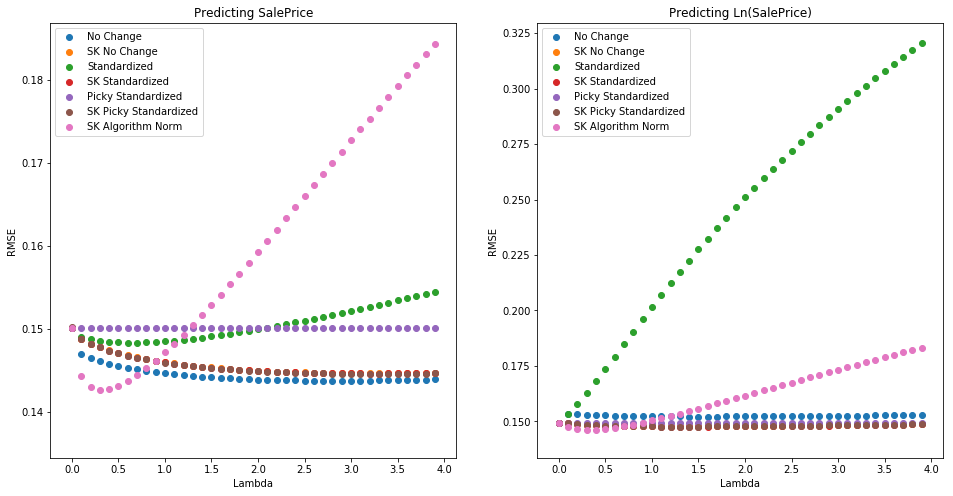

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].scatter(np.arange(0, 4, 0.1), none_calcs, label='No Change')
ax[0].scatter(np.arange(0, 4, 0.1), sk_none_calcs, label='SK No Change')
ax[0].scatter(np.arange(0, 4, 0.1), stand_calcs, label='Standardized')
ax[0].scatter(np.arange(0, 4, 0.1), sk_stand_calcs, label='SK Standardized')
ax[0].scatter(np.arange(0, 4, 0.1), pstand_calcs, label='Picky Standardized')
ax[0].scatter(np.arange(0, 4, 0.1), sk_pstand_calcs, label = 'SK Picky Standardized')
ax[0].scatter(np.arange(0, 4, 0.1), sk_norm, label = 'SK Algorithm Norm')
ax[1].scatter(np.arange(0, 4, 0.1), log_none_calcs, label='No Change')
ax[1].scatter(np.arange(0, 4, 0.1), log_sk_none_calcs, label='SK No Change')
ax[1].scatter(np.arange(0, 4, 0.1), log_stand_calcs, label='Standardized')
ax[1].scatter(np.arange(0, 4, 0.1), log_sk_stand_calcs, label='SK Standardized')
ax[1].scatter(np.arange(0, 4, 0.1), log_pstand_calcs, label='Picky Standardized')
ax[1].scatter(np.arange(0, 4, 0.1), log_sk_pstand_calcs, label = 'SK Picky Standardized')
ax[1].scatter(np.arange(0, 4, 0.1), log_sk_norm, label = 'SK Algorithm Norm')
ax[0].set_xlabel('Lambda')
ax[0].set_ylabel('RMSE')
ax[0].set_title('Predicting SalePrice')
ax[1].set_xlabel('Lambda')
ax[1].set_ylabel('RMSE')
ax[1].set_title('Predicting Ln(SalePrice)')
ax[0].legend()
ax[1].legend()
plt.show()